In [1]:
# Importing necessaries libraires
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB


In [22]:
# Loading the dataset
data = pd.read_csv("/content/synthetic_dataset.csv")
# data = pd.read_csv("/content/synthetic_text_data.csv")

# clone the dataset
df = data.copy()
print("Total dataset size", df.shape)
df.sample(2)

Total dataset size (21456, 2)


,Text,Emotion
13849,Nothing seems to alone.,sadness
256,I'm so mad I could what happened!,anger


In [3]:
# Preprocessing of data

# Spliting the data into X and Y parts
X = data['Text']
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
# Text processing - Converting Text to  Numeric Features
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test) # Corrected: Use .transform() instead of .fit_transform() for the test set

In [5]:
# Training the Naive Bayes Classifier
from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [6]:
# Making Prediction
y_pred = model.predict(X_test_vec)

Accuracy 1.0


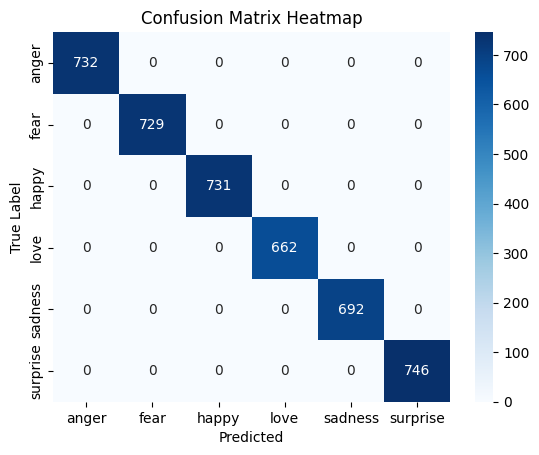

In [7]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy",  accuracy)

class_labels = np.unique(y_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

# Note on overfitting: While Naive Bayes is generally less prone to overfitting,
# techniques to reduce it (like data augmentation, feature engineering,
# or adjusting model hyperparameters such as 'alpha' for MultinomialNB)
# would typically be applied in the data preprocessing or model training phases,
# not directly in this model evaluation cell.

## Classification of Text Documents using Naive Bayes

1. CountVectorizer to convert text data into numerical features using word counts.
2. MultinomialNB: The Naive Bayes classifier for multinomial data and is ideal for text classification.

3. train_test_split: Splits the data into training (80%) and testing (20%) sets.
4. random_state: ensures reproducibility.

5. CountVectorizer(): Converts the raw text into a matrix of word counts.
6. fit_transform(): Learns the vocabulary from the training data and transforms the text into vector.
7. transform(): Applies the learned vocabulary from the training data to the test data.
8. accuracy_score(): Calculates the accuracy of the model by comparing the predicted labels (y_pred) with the true labels (y_test).
9. confusion_matrix(): Generates a confusion matrix to visualize how well the model classifies each category.

In [10]:
# Saving model for further use - Using joblib module
from joblib  import parallel, delayed
import joblib

# save the model
joblib.dump(model, "filename.pkl")

# load the model from the file
model = joblib.load("filename.pkl")



In [26]:
# Prediction of Unseen Data
user_input = input("Enter your text : ")

user_input_vec = vec.transform([user_input])
predicted_label = model.predict(user_input_vec)
print(f"The Input text belongs to the {predicted_label} category")

Enter your text : my friend need a car 
The Input text belongs to the ['sadness'] category
